# Assignment 1



In this assignment, we will learn how to download data from the Yahoo Finance dataset. We will learn how to plot and perform some simple analysis of the datase.

This code is created by Dr. Teerasit Kasetkasem on December 8, 2020

## Download stock price from Yahoo Finance

There are approaches to download stock price from Yahoo Finance. Here, We use the panadas_datareader library to download.

In [2]:
import pandas as pd
import pandas_datareader as reader
import numpy as np
import matplotlib.pyplot as plt

In [3]:
apple = reader.DataReader("AAPL", "yahoo","2010-01-01","2020-12-31") #load Apple Inc. (AAPL) from yahoo finance from 2010/01/01 to 2020/12/31
apple.head() # print first few heading rows. 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.492369
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.593423
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.604822
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.499765
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.487749


In this exercise, the goal is to find the dividends that Apple has issued for the last 10 years.

Text(0, 0.5, 'Difference in Change')

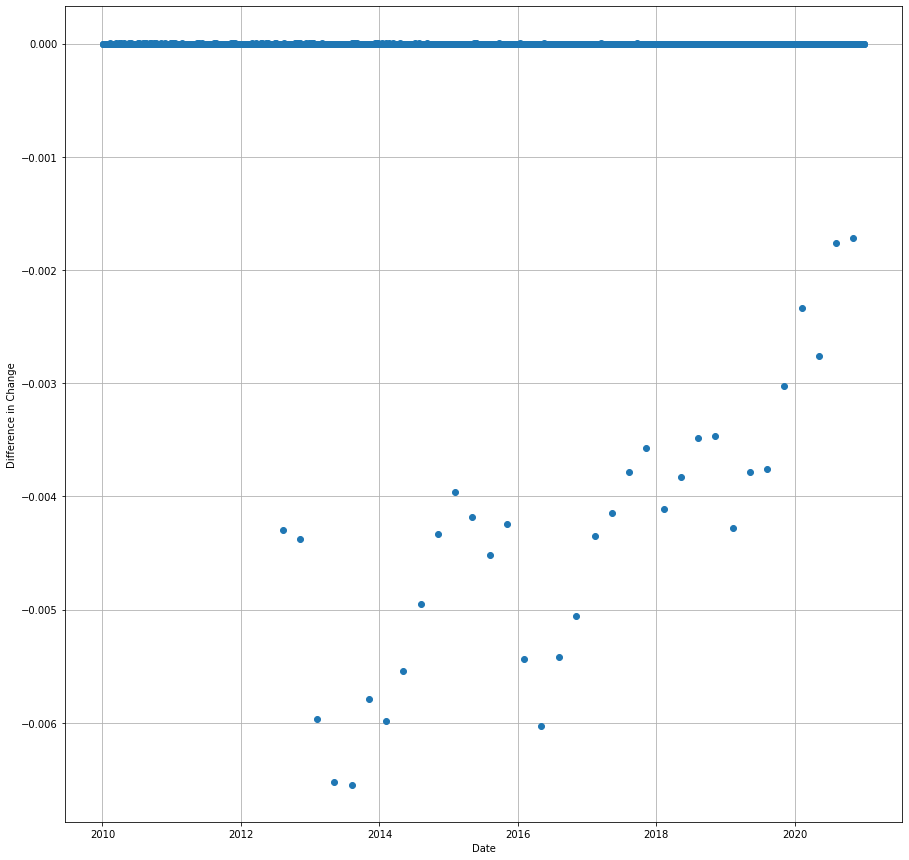

In [4]:

adj_close = apple['Adj Close'] # adjusted close prices
pct_adj_close = adj_close.pct_change(1) # find daily percent changes 
close = apple['Close'] # close price
pct_close = close.pct_change(1) # find daily percent changes 
plt.figure(figsize=(15,15))
plt.plot(pct_close- pct_adj_close, "o")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Difference in Change")

From the graph above, it is clear that, most of the times, normalized changes in the close and adj. close prices are similar. However, there are few cases where changes in adj. close prices are higher that close price. This is the location where dividens are paid to share holders.

In [5]:
delta = pct_close- pct_adj_close 
threshold = -0.001 # We pick threshold = -0.001 from the graph.
delta = delta[delta<threshold] # screen only the location where differences is less than -0.001
print("The dividens are paid out on:")
for date in delta.index:
  print(date.date())

The dividens are paid out on:
2012-08-09
2012-11-07
2013-02-07
2013-05-09
2013-08-08
2013-11-06
2014-02-06
2014-05-08
2014-08-07
2014-11-06
2015-02-05
2015-05-07
2015-08-06
2015-11-05
2016-02-04
2016-05-05
2016-08-04
2016-11-03
2017-02-09
2017-05-11
2017-08-10
2017-11-10
2018-02-09
2018-05-11
2018-08-10
2018-11-08
2019-02-08
2019-05-10
2019-08-09
2019-11-07
2020-02-07
2020-05-08
2020-08-07
2020-11-06


Next, we try to find the dividends payout by Apples.

In [6]:
dividends =[]
for date in delta.index:
  k = np.nonzero(apple.index==date)[0][0] # find the row where dividends have been paid.
  close_before = close[k-1]
  pct_close_div = pct_close[k]
  pct_adj_div = pct_adj_close[k]
  dividend = close_before * ( pct_adj_div - pct_close_div)
  dividends.append(dividend)
dividends = pd.Series(dividends, index=delta.index)
print(dividends)

Date
2012-08-09    0.095186
2012-11-07    0.091022
2013-02-07    0.097456
2013-05-09    0.107978
2013-08-08    0.108717
2013-11-06    0.108614
2014-02-06    0.109562
2014-05-08    0.117288
2014-08-07    0.117486
2014-11-06    0.117833
2015-02-05    0.118336
2015-05-07    0.130803
2015-08-06    0.130284
2015-11-05    0.129398
2016-02-04    0.131043
2016-05-05    0.141931
2016-08-04    0.143383
2016-11-03    0.140976
2017-02-09    0.143529
2017-05-11    0.158858
2017-08-10    0.152493
2017-11-10    0.156970
2018-02-09    0.159423
2018-05-11    0.181804
2018-08-10    0.181947
2018-11-08    0.181867
2019-02-08    0.182720
2019-05-10    0.189833
2019-08-09    0.190911
2019-11-07    0.194723
2020-02-07    0.189879
2020-05-08    0.209884
2020-08-07    0.200337
2020-11-06    0.204769
dtype: float64


In [7]:
yearly_dividends = []
for y in range(2015,2021): # Find dividens growth rate in the last 5 years.
  dividend_year = dividends[dividends.index.year == y] #filter only one year
  yearly_dividends.append(dividend_year.sum()) # find total dividens per year
yearly_dividends = pd.Series(yearly_dividends, index=np.arange(2015,2021))
dividend_growth = yearly_dividends.pct_change(1).dropna()
print("Yearly dividends: ")
print(yearly_dividends)
print("Dividend growth rate: ")
print(dividend_growth)
g = dividend_growth.median()
print(f"Dividends growth rate is {g*100} %.")

Yearly dividends: 
2015    0.508820
2016    0.557332
2017    0.611851
2018    0.705041
2019    0.758187
2020    0.804869
dtype: float64
Dividend growth rate: 
2016    0.095341
2017    0.097821
2018    0.152308
2019    0.075381
2020    0.061570
dtype: float64
Dividends growth rate is 9.534141077827574 %.


Now, we can use discount factor to compute the stock price

In [8]:
r = 0.1 # Assume that we can find the risk-free security at 10%
S_apple = yearly_dividends[2020]/(r - g) # D1/(r - g)
print(f"The current apple stock price is {adj_close.iloc[-1]}.") # 
print(f"From the Discounted Cash Flow model, Apple Stock price is {S_apple}.")


The current apple stock price is 132.69000244140625.
From the Discounted Cash Flow model, Apple Stock price is 172.77090128811324.


## Class work

**Follow the above steps to find dividends, dividend growth rate, and DCF of  5 stocks in SET50, namely**

> Indented block




1.  PTT
2.  AOT
3.  KBANK
4.  CAPLL
5.  ADVANC



---


**Here, you will use only the data from 2016-01-01 to 2020-12-31


